<a href="https://colab.research.google.com/github/sorennelson/Deep_Learning_with_Python/blob/master/IMDB_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [2]:
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
# Dictionary mapping words to indices
word_index = imdb.get_word_index()
# Map indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Decode review
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
# Map integers to binary array
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')
x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [50]:
hist = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 124us/step - loss: 0.0029 - binary_accuracy: 0.9999 - val_loss: 0.6941 - val_binary_accuracy: 0.8644
Epoch 2/4
15000/15000 [==============================] - 2s 131us/step - loss: 0.0048 - binary_accuracy: 0.9990 - val_loss: 0.7217 - val_binary_accuracy: 0.8646
Epoch 3/4
15000/15000 [==============================] - 2s 132us/step - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 0.7480 - val_binary_accuracy: 0.8641
Epoch 4/4
15000/15000 [==============================] - 2s 132us/step - loss: 0.0037 - binary_accuracy: 0.9996 - val_loss: 0.7829 - val_binary_accuracy: 0.8642


<function matplotlib.pyplot.show>

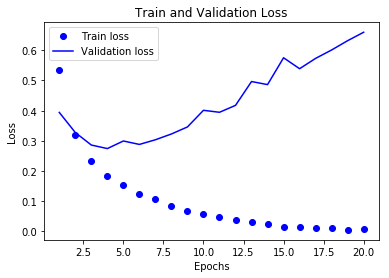

In [48]:
hist_dict = hist.history

loss_vals = hist_dict['loss']
val_loss_vals = hist_dict['val_loss']

epochs = range(1, len(hist_dict['binary_accuracy']) + 1)
# bo - blue dot
plt.plot(epochs, loss_vals, 'bo', label='Train loss')
# b - solid blue line
plt.plot(epochs, val_loss_vals, 'b', label='Validation loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

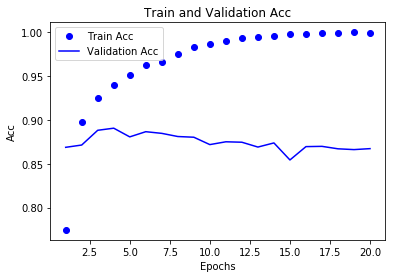

In [49]:
plt.clf()
acc_vals = hist_dict['binary_accuracy']
val_acc_vals = hist_dict['val_binary_accuracy']

plt.plot(epochs, hist_dict['binary_accuracy'], 'bo', label="Train Acc")
plt.plot(epochs, hist_dict['val_binary_accuracy'], 'b', label="Validation Acc")
plt.title('Train and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show

In [54]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.4620 - binary_accuracy: 0.8092
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2601 - binary_accuracy: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.2015 - binary_accuracy: 0.9301
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.1662 - binary_accuracy: 0.9421


In [55]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 89us/step


[0.3274511679840088, 0.87144]